<a href="https://colab.research.google.com/github/ArcanjoLucas00/cap_14_fase3/blob/main/LucasArcanjoNoquelliDaSilva_RM563353_Fase3_Cap14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade CAP 14 - Produtos Agrícolas



In [1]:
import numpy as np
import pandas as pd

## Carregando Dados

In [2]:
dados_produtos = pd.read_csv('Atividade_Cap_14_produtos_agricolas.csv', sep = ',')

## Exibindo tabela para análise primária dos dados

In [3]:
print(dados_produtos.sample(n=20))

        N    P    K  temperature   humidity        ph    rainfall        label
396    30   63   16    23.605066  21.905396  5.525905  100.597873  kidneybeans
351     3   67   24    17.000676  19.907905  5.520880  103.292641  kidneybeans
1823   31   13   33    27.638349  95.487634  5.859719  205.546311      coconut
2138  106   40   30    23.426116  64.106515  6.779984  122.684741       coffee
724    20   60   25    27.325421  69.090478  6.726469   61.192509    blackgram
1564   17  136  196    23.871923  90.499390  5.882156  103.054809        apple
37     95   39   36    23.863305  83.152508  5.561399  285.249365         rice
132    84   57   25    22.535105  67.992575  6.489040   64.408660        maize
406    40   70   20    31.801303  45.031862  5.623490  147.036144   pigeonpeas
526     8   60   18    31.216300  46.018682  3.808429   53.120528    mothbeans
125    79   51   16    25.337977  68.498360  6.586245   96.463802        maize
72     79   42   37    24.873007  82.840226  6.58791

## Análise Exploratória:
1 - Informações Gerais sobre o dataframe:

In [4]:
print(dados_produtos.shape)

(2200, 8)


## Tipos de dados e valores não nulos

In [5]:
dados_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Estatística Descritiva das Variáveis Numéricas

In [6]:
print(dados_produtos.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


## Análise da variável 'label'

In [7]:
print(dados_produtos['label'].unique())
print(dados_produtos['label'].value_counts())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


## Distribuição das Culturas

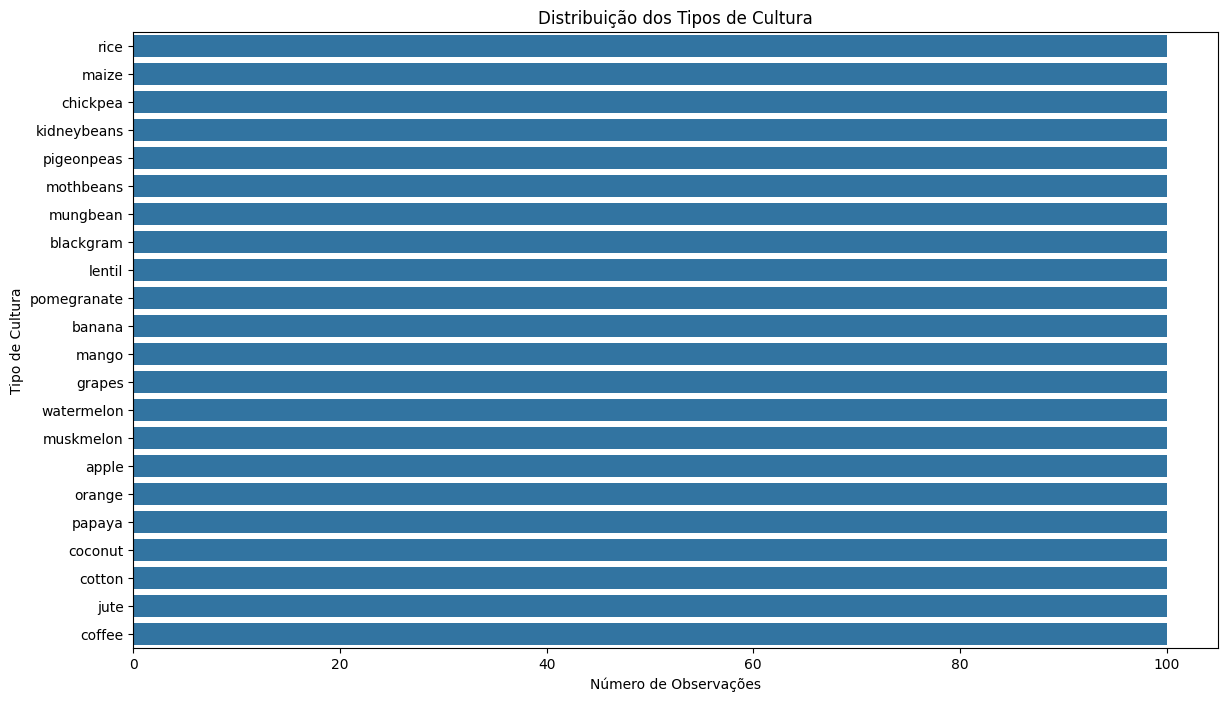

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.countplot(data=dados_produtos, y='label', order=dados_produtos['label'].value_counts().index)
plt.title('Distribuição dos Tipos de Cultura')
plt.xlabel('Número de Observações')
plt.ylabel('Tipo de Cultura')
plt.show()

## Valores Ausentes

In [9]:
print(dados_produtos.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


## Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

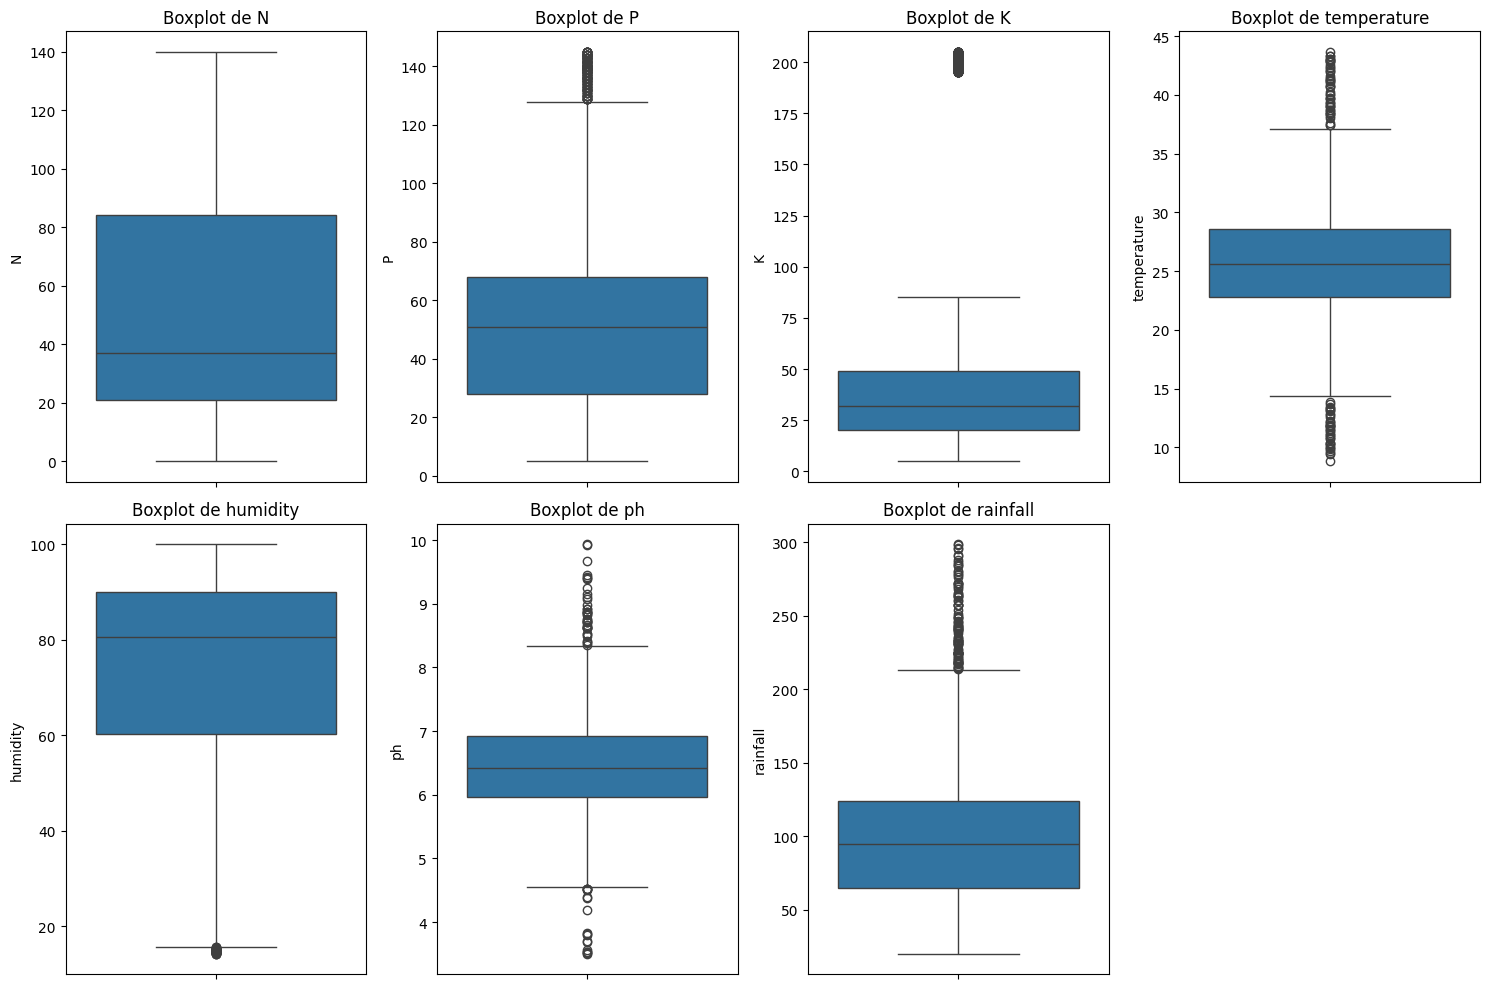

In [10]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
  plt.subplot(2, 4, i + 1)
  sns.boxplot(y=dados_produtos[column])
  plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show

## Correlação de Variáveis Numéricas

In [11]:
correlation_matrix = dados_produtos[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
print(correlation_matrix)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


## heatmap

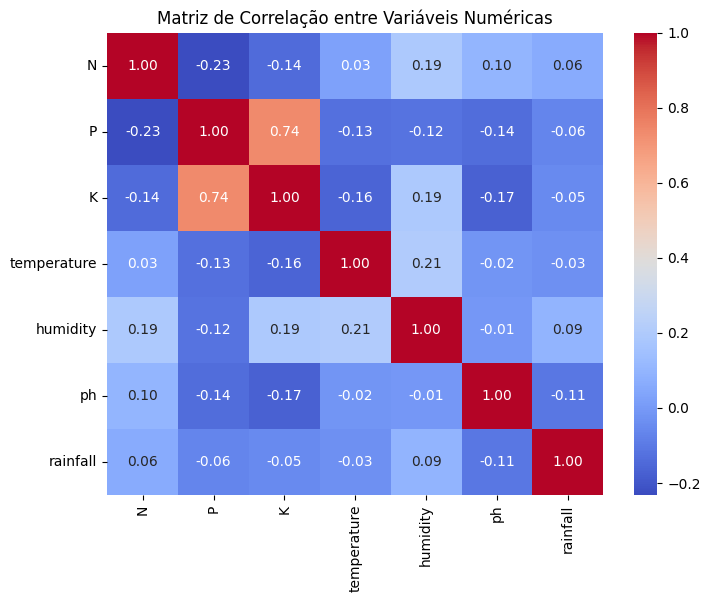

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Análise Descritiva

## Histograma

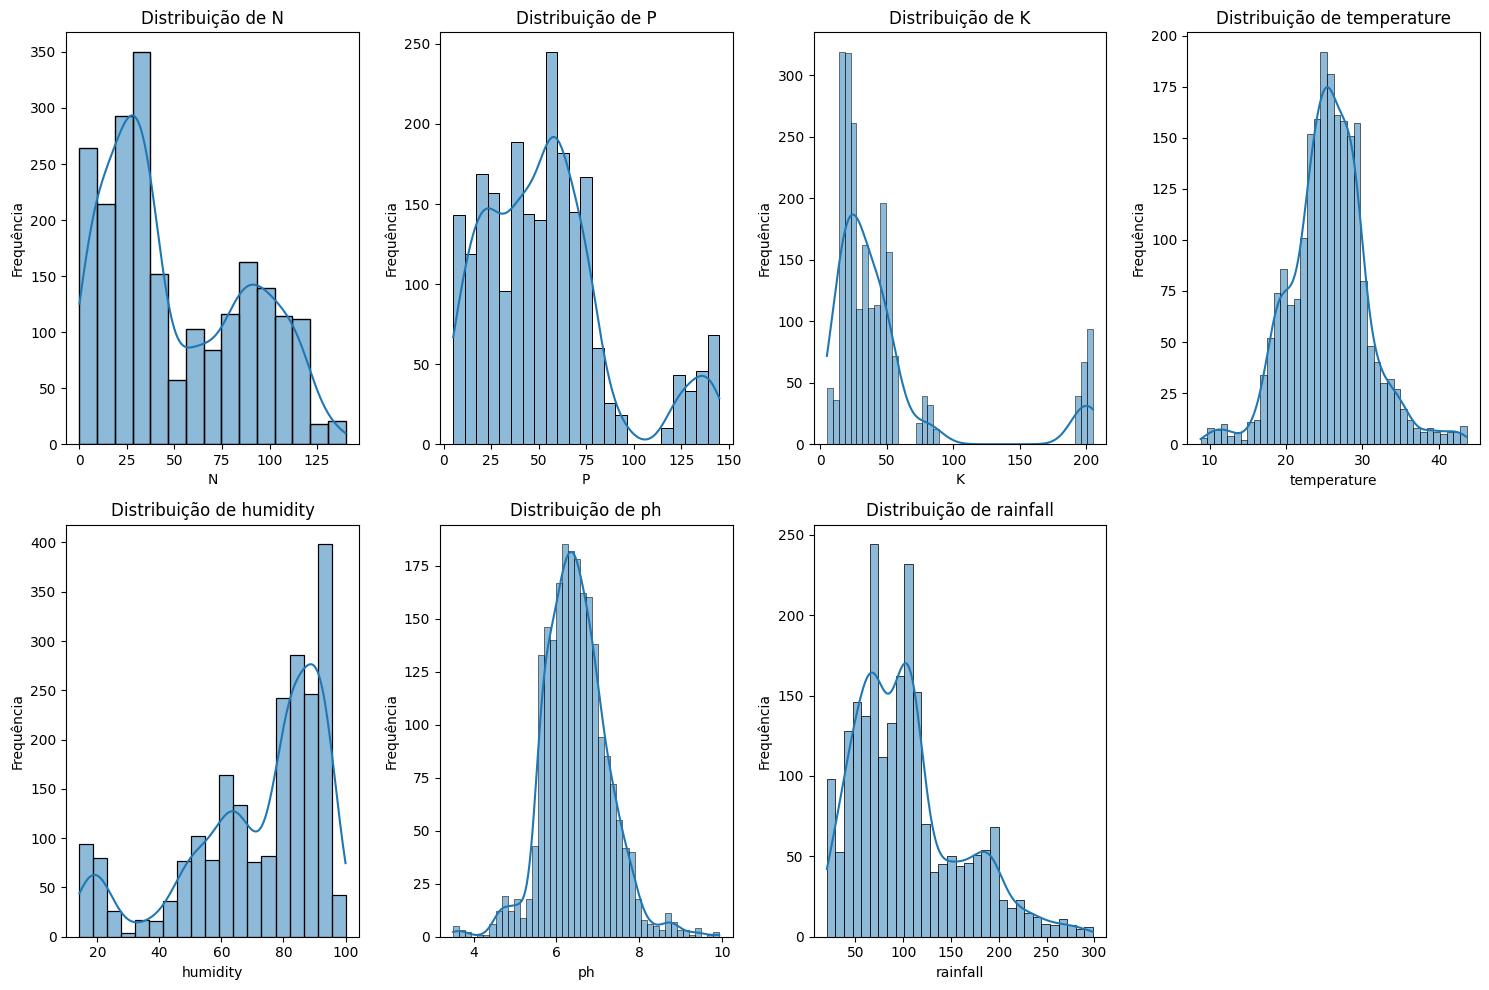

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, column in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
  plt.subplot(2, 4, i + 1)
  sns.histplot(dados_produtos[column], kde=True)
  plt.title(f'Distribuição de {column}')
  plt.xlabel(column)
  plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

**No Histograma, houve a intenção visualizar a distribuição de cada variável numérica individualmente para entender a forma, a centralidade e a dispersão de cada uma delas.**

*Sendo as variáveis: N; P; K; temperature, humidity, ph, rainfall*

Com base nos histogramas acima foi possível identificar:

**N(nitrogênio):** A distribuição se apresenta de uma forma mais dispersa(espalhada), tendo seu pico entre 25 e 50.

**P(fósforo)**: A variável apresenta uma grande variabilidade entre os tipos de cultura. Em geral, se concentram em uma faixa mais elevada, entre 50 e 250, tendo poucas faixas abaixo destas.

**K(potássio)**: Essa variável apresenta uma grande diferença entre as faixas. Em suma, as faixas tendem a ser menores, porém apresenta faixas extremamente elevadas em determinadas culturas. O que gera uma disparidade elevada.

**Temperature**: A análise da variável que as culturas, em geral, tem melhor desenvolvimento nas faixas de temperatura de 20ºC a 35ºC (aproximadamente).

**Humidity(humidade)**: Essa variável é representada por uma grande variação. Havendo faixas espalhadas entre 20% de humidade a 90% de humidade. Mostra a variação ideal para cada tipo de cultura. Mostra também que algumas culturas possuem humidade ideal em uma faixa próxima, entretanto ainda com uma variação grande em um contexto geral.

**pH**: As faixas desta variável se concentram em uma faixa ácida-neutra (5.4 a 7.5), as faixas no histograma se concentram entre 5.5 e 6.5 aproximadamente.

**Rainfall(precipitação)**: Apresenta uma grande variação entre as faixas do histograma. Contendo valores baixos em torno de 25mm e chegando a ter picos próximos a 100mm.

## Gráfico de Barras

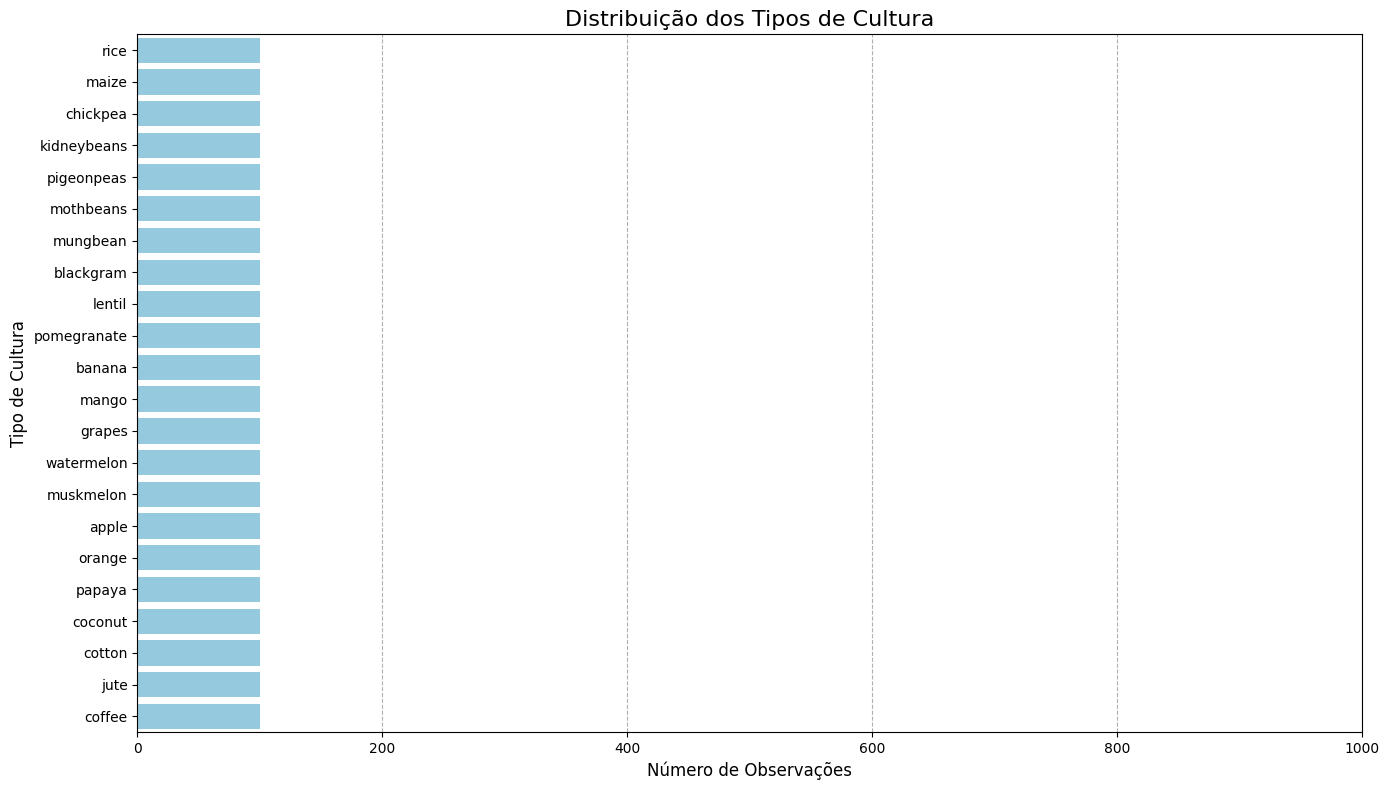

In [21]:
cor_barras = 'skyblue'
plt.figure(figsize=(14, 8))
sns.countplot(data=dados_produtos, y='label', order=dados_produtos['label'].value_counts().index, color=cor_barras)
plt.xlim(0, 1000)
plt.title('Distribuição dos Tipos de Cultura', fontsize=16)
plt.xlabel('Número de Observações', fontsize=12)
plt.ylabel('Tipo de Cultura', fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

Com o gráfico de barras, o objetivo foi identificar a frequência de cada tipo de cultura presente na base de dados

## Gráfico de Dispersão

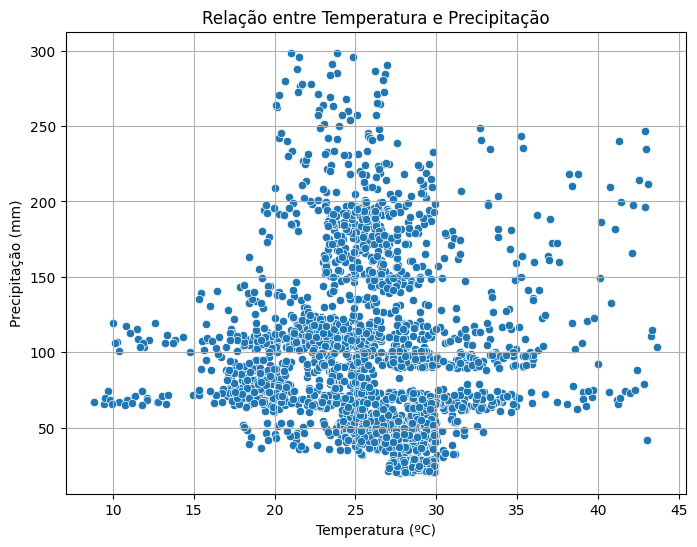

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dados_produtos, x='temperature', y='rainfall')
plt.title('Relação entre Temperatura e Precipitação')
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Precipitação (mm)')
plt.grid(True)
plt.show()

No gráfico de dispersão a busca foi por uma correlação entre a temperatura média e a precipitação da região.
Para essa análise utilizamos as variáveis "temperature" e "rainfall".

Foi possível identificar que há maior taxa de precipitação quando a temperatuda está entre 20ºC e 30ºC. Com a precipitação variando entre 50mm e 150mm em grande maioria das vezes.

## Boxplot

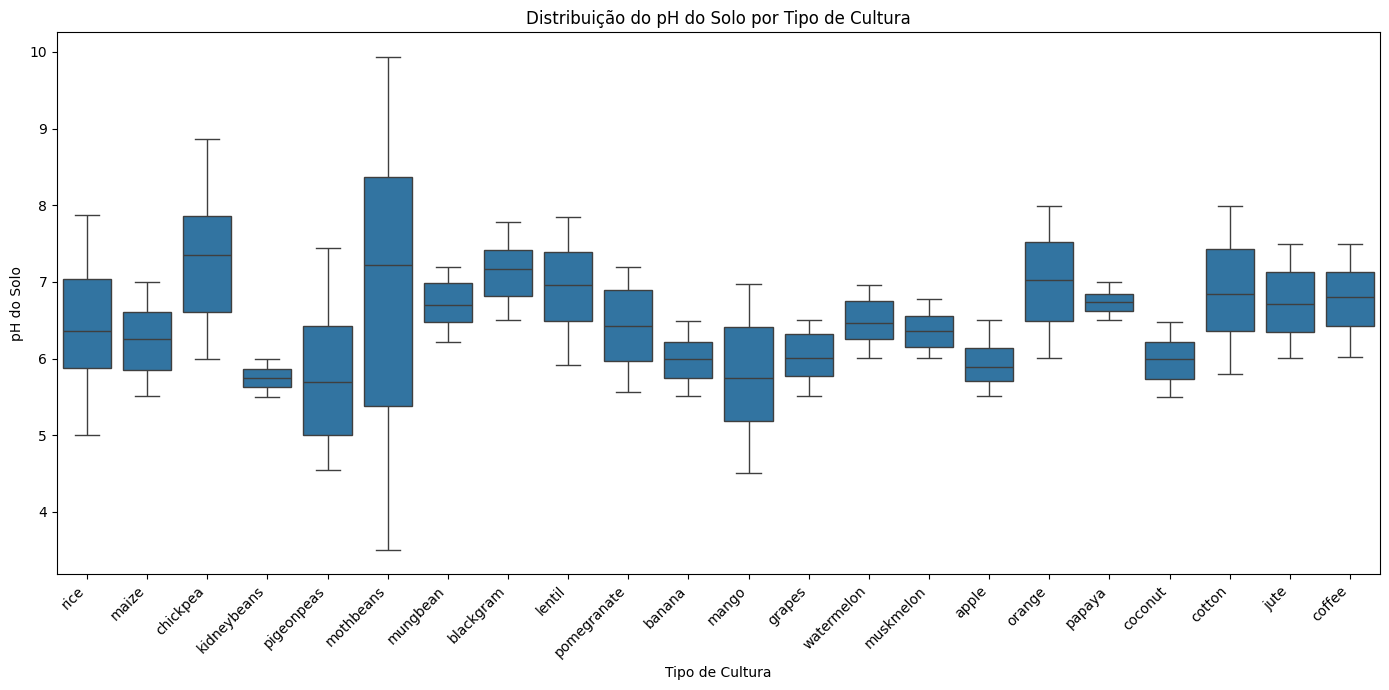

In [18]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=dados_produtos, x='label', y='ph')
plt.title('Distribuição do pH do Solo por Tipo de Cultura')
plt.xlabel('Tipo de Cultura')
plt.ylabel('pH do Solo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O objetivo da utilização do Gráfico Boxplot foi identificar a distribuição do pH do Solo em relação a cada tipo de cultura. Permitindo com que haja reconhecimento de qual faixa de pH de solo cada Cultura responde de maneira esperada e com melhor retorno de produção.

## Heatmap (Mapa de Calor)

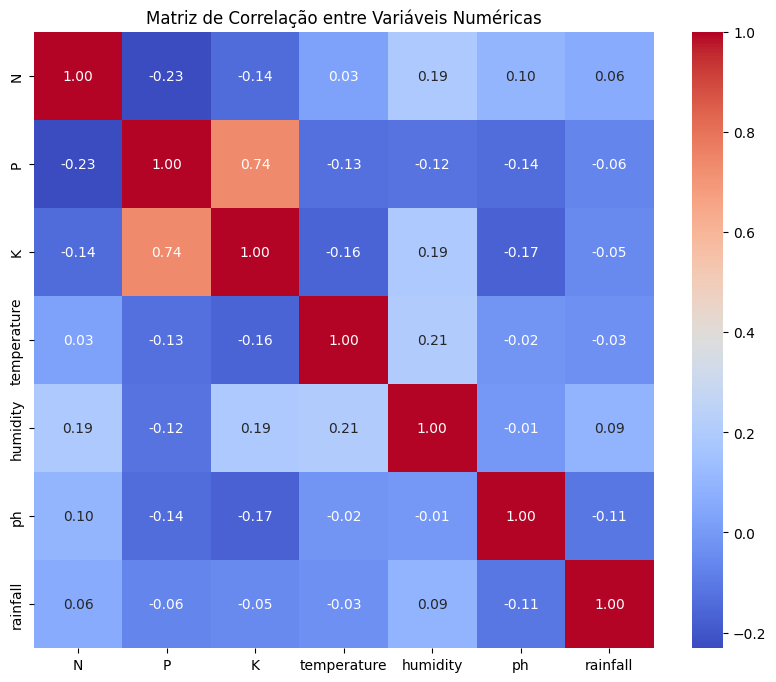

In [19]:
correlation_matrix = dados_produtos[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

Utilizando o Mapa de Calor, a ideia é correlacionartodas as variáveis numéricas, buscando identificar se essa correlação é positiva, negativa ou ausente.